In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib
%matplotlib inline  
matplotlib.get_backend()
data = pd.read_csv("C:\\Users\\forum\\Desktop\\Github\\Tweet\\Tweet\\gender-classifier-DFE-791531.csv", encoding='latin-1')

In [2]:
data.shape

(20050, 26)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
_unit_id                 20050 non-null int64
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
_last_judgment_at        20000 non-null object
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
created                  20050 non-null object
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
profileimage             20050 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text    

In [4]:
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [5]:
data.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [6]:
#removing unnecesasary columns for analysis 
newdata=pd.read_csv("C:\\Users\\forum\\Desktop\\Github\\Tweet\\Tweet\\gender-classifier-DFE-791531.csv",usecols= [0,5,19,17,21,10,11],encoding='latin1')


In [7]:
newdata.head()

,_unit_id,gender,description,fav_number,retweet_count,text,tweet_count
0,815719226,male,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964
1,815719227,male,I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471
2,815719228,male,louis whining and squealing and all,7696,1,i absolutely adore when louis starts the songs...,5617
3,815719229,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0,Hi @JordanSpieth - Looking at the url - do you...,1693
4,815719230,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,0,Watching Neighbours on Sky+ catching up with t...,31462


In [8]:
#datacleaning process
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

newdata['Tweets'] = [cleaning(s) for s in newdata['text']]
newdata['Description'] = [cleaning(s) for s in newdata['description']]

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\forum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
newdata['Tweets'] = newdata['Tweets'].str.lower().str.split()
newdata['Tweets'] = newdata['Tweets'].apply(lambda x : [item for item in x if item not in stop])

In [11]:
newdata.head(2)

,_unit_id,gender,description,fav_number,retweet_count,text,tweet_count,Tweets,Description
0,815719226,male,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964,"[robbie, e, responds, critics, win, eddie, edw...",i sing my own rhythm
1,815719227,male,I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471,"[ûïit, felt, like, friends, living, story, û, ...",i m the author of novels filled with family dr...


In [12]:
newdata.gender.value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [13]:
#wordcount
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 

In [14]:
comment_words = ' '
stopwords = set(STOPWORDS) 
  

In [15]:
# iterate through the csv file 
for val in data.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
for words in tokens: 
    comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

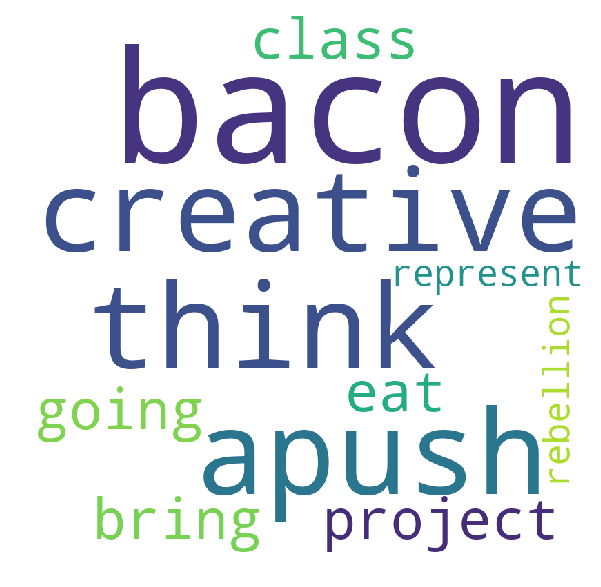

In [16]:
# plot the WordCloud image of all text used irrespective of gender in original dataset                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [17]:
Male = newdata[newdata['gender'] == 'male']
Female = newdata[newdata['gender'] == 'female']
Brand = newdata[newdata['gender'] == 'brand']
Male_Words = pd.Series(' '.join(Male['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
Female_Words = pd.Series(' '.join(Female['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
Brand_words = pd.Series(' '.join(Brand['Tweets'].astype(str)).lower().split(" ")).value_counts()[:10]

In [18]:
#wordcount based on gender
Female_Words

'ù',         1025
'like',       403
'get',        314
'one',        270
'day',        253
'ù']          248
'love',       240
'go',         239
'û',          235
'time',       201
'amp',        196
'people',     194
'âù',         189
'know',       174
'last',       171
'new',        170
'got',        157
'ü',          155
'back',       155
'make',       154
dtype: int64

In [19]:
Male_Words

'ù',         365
'like',      322
'get',       309
'û',         235
'one',       209
'new',       192
'time',      191
'go',        185
'love',      179
'people',    155
'day',       153
'see',       151
'good',      150
'amp',       148
'know',      148
'would',     139
'back',      138
'think',     133
'make',      132
'got',       131
dtype: int64